In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df=pd.read_csv('/content/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0
7971,10981,1.226153,-0.129645,0.735197,0.142752,-0.703245,-0.349641,-0.612641,0.020507,1.648986,...,-0.047936,0.040196,-0.057391,-0.012386,0.187685,1.037786,-0.100081,-0.009869,15.95,0.0
7972,10981,1.145381,-0.059349,0.968088,0.267891,-0.822582,-0.597727,-0.450197,-0.119747,1.338188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(7973, 31)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

**DATA CLEANING(HANDLING MISSING VALUES)**

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [8]:
df1=df.fillna(method='ffill')

In [9]:
df1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df['Class'].value_counts()

0.0    7947
1.0      25
Name: Class, dtype: int64

**DIVIDING CLASSES INTO legit and fraud**

In [11]:
legit=df1[df1.Class==0]
fraud=df1[df1.Class==1]

In [12]:
print(legit.shape)
print(fraud.shape)

(7948, 31)
(25, 31)


**STATISTICAL ANALYSIS**

In [13]:
legit.Amount.describe()

count    7948.000000
mean       65.278684
std       194.115122
min         0.000000
25%         4.797500
50%        15.950000
75%        54.990000
max      7712.430000
Name: Amount, dtype: float64

In [19]:
fraud.Amount.describe()

count      25.000000
mean      106.308400
std       372.676883
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [20]:
df1.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,4247.39381,-0.297053,0.286936,0.917149,0.201976,-0.023363,0.163923,-0.019601,-0.072784,0.662281,...,0.042397,-0.055122,-0.165459,-0.034921,0.026631,0.088973,0.019639,0.014860,0.000415,65.278684
1.0,7359.24000,-1.154048,2.930880,-4.757618,4.590240,-0.636103,-1.952536,-2.202403,0.647916,-1.581984,...,0.263011,0.393614,-0.265715,-0.116502,-0.183413,0.067479,0.256994,0.421586,0.237600,106.308400


In [16]:
legit_sample=legit.sample(n=81)

In [17]:
df2=pd.concat([legit_sample,fraud],axis=0)

In [21]:
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2912,2462,0.754835,-1.147186,1.024039,0.440011,-1.740749,-0.609469,-0.477543,0.041250,1.255365,...,0.024673,-0.320169,-0.082458,0.760838,-0.062434,0.950739,-0.085604,0.056109,235.37,0.0
2969,2512,-0.674481,0.363415,1.389611,-0.816167,-0.037817,-0.301957,0.975203,-0.068778,-2.130971,...,-0.643169,-1.696397,0.286870,-0.115078,-0.200028,-1.017695,0.078060,0.122241,101.93,0.0
1619,1256,1.350757,-0.332866,0.001453,-0.594763,-0.684586,-0.827280,-0.482697,-0.221653,-0.862776,...,0.050748,0.038799,-0.110279,-0.169617,0.452921,-0.259139,0.028261,0.049768,49.90,0.0
4376,3764,1.359084,-0.449699,0.797241,-0.522072,-1.202307,-0.823374,-0.836117,-0.062523,0.443058,...,-0.198935,-0.543230,0.179914,0.423024,0.104800,-0.545294,-0.028370,0.004615,4.96,0.0
5646,5874,-0.507367,0.506200,2.811876,0.673505,-0.575466,-0.534416,-0.443736,0.013591,1.226229,...,0.232971,0.952379,-0.062058,0.732922,-0.625594,0.538160,0.125063,0.159355,0.11,0.0


In [22]:
df2.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6870,8757,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,-1.439396,...,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1.00,1.0
6882,8808,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,0.472017,...,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,1.10,1.0
6899,8878,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,...,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1.00,1.0
6903,8886,-2.535852,5.793644,-7.618463,6.395830,-0.065210,-3.136372,-3.104557,1.823233,-3.878658,...,0.716720,-0.448060,-0.402407,-0.288835,1.011752,0.425965,0.413140,0.308205,1.00,1.0
6971,9064,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1.0


**VISUALIZATION**

<Axes: >

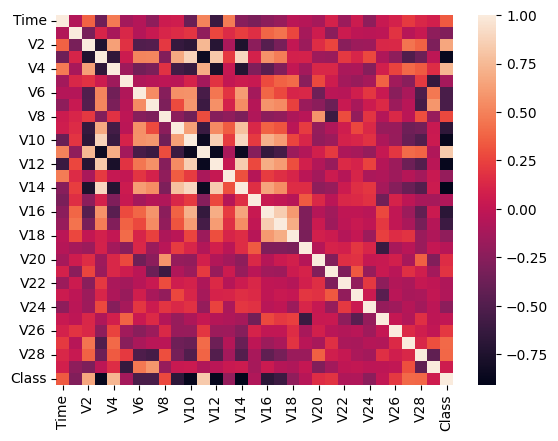

In [43]:
corr=df2.corr()
sns.heatmap(corr)

In [23]:
df2['Class'].value_counts()

0.0    81
1.0    25
Name: Class, dtype: int64

In [24]:
df2.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,4706.938272,-0.193554,0.421459,1.021783,0.401807,-0.174485,0.162307,0.084085,-0.128103,0.663437,...,0.068915,-0.007906,-0.133782,-0.037761,0.112870,0.071904,0.025491,0.041260,-0.008104,72.140247
1.0,7359.240000,-1.154048,2.930880,-4.757618,4.590240,-0.636103,-1.952536,-2.202403,0.647916,-1.581984,...,0.263011,0.393614,-0.265715,-0.116502,-0.183413,0.067479,0.256994,0.421586,0.237600,106.308400


**SELECTING FEATURES AND TARGET**

In [25]:
X=df2.drop(columns='Class',axis=1)
Y=df2['Class']

In [26]:
print(X)

      Time        V1        V2        V3        V4        V5        V6  \
2912  2462  0.754835 -1.147186  1.024039  0.440011 -1.740749 -0.609469   
2969  2512 -0.674481  0.363415  1.389611 -0.816167 -0.037817 -0.301957   
1619  1256  1.350757 -0.332866  0.001453 -0.594763 -0.684586 -0.827280   
4376  3764  1.359084 -0.449699  0.797241 -0.522072 -1.202307 -0.823374   
5646  5874 -0.507367  0.506200  2.811876  0.673505 -0.575466 -0.534416   
...    ...       ...       ...       ...       ...       ...       ...   
6870  8757 -1.863756  3.442644 -4.468260  2.805336 -2.118412 -2.332285   
6882  8808 -4.617217  1.695694 -3.114372  4.328199 -1.873257 -0.989908   
6899  8878 -2.661802  5.856393 -7.653616  6.379742 -0.060712 -3.131550   
6903  8886 -2.535852  5.793644 -7.618463  6.395830 -0.065210 -3.136372   
6971  9064 -3.499108  0.258555 -4.489558  4.853894 -6.974522  3.628382   

            V7        V8        V9  ...       V20       V21       V22  \
2912 -0.477543  0.041250  1.255365  ..

In [27]:
print(Y)

2912    0.0
2969    0.0
1619    0.0
4376    0.0
5646    0.0
       ... 
6870    1.0
6882    1.0
6899    1.0
6903    1.0
6971    1.0
Name: Class, Length: 106, dtype: float64


**SPLITTING DATA INTO TRAINING AND TESTING**

In [28]:
 X_train ,X_test,Y_train,Y_test =train_test_split(X,Y,stratify=Y,random_state=2)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(106, 30) (79, 30) (27, 30)


**MODEL TRAINING**

In [30]:
model=LogisticRegression()

In [31]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**MODEL PREDICTION AND PERFORMANCE EVALUATION**

In [37]:
X_train_Prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_Prediction,Y_train)*100

In [38]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 100.0


In [39]:
X_test_Prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_Prediction,Y_test)*100

In [49]:
print('Accuracy on testing data:',testing_data_accuracy)

Accuracy on testing data: 96.29629629629629


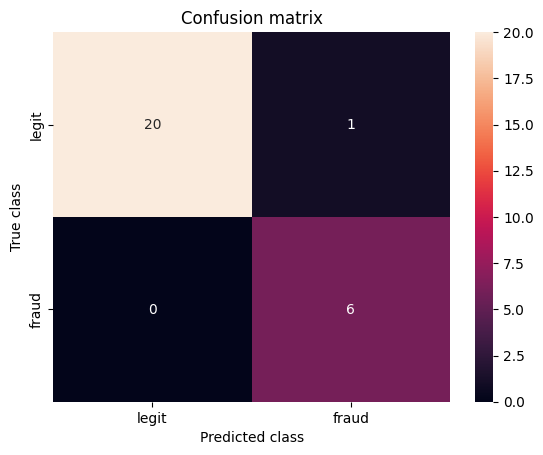

In [50]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

LABELS = ['legit','fraud']
conf_matrix = confusion_matrix(Y_test,X_test_Prediction )
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [60]:
prec = precision_score(Y_test,X_test_Prediction)
print("The precision is {}".format(prec))

The precision is 0.8571428571428571


In [58]:
rec = recall_score(Y_test,X_test_Prediction)
print("The recall is {}".format(rec))

The recall is 1.0


In [59]:
f1 = f1_score(Y_test,X_test_Prediction)
print("The F1-Score is {}".format(f1))

The F1-Score is 0.923076923076923
